In [1]:
import pandas as pd
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

c:\Users\adrim\.conda\envs\TFG\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\adrim\.conda\envs\TFG\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\adrim\.conda\envs\TFG\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\adrim\.conda\envs\TFG\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
big_df = pd.read_csv("UTA_dataset_pupil/big_df.csv")
big_df["label"] = big_df["label"].astype("int")
big_df["frame"] = big_df["frame"].astype("int")

In [4]:
subject_dict = {
            # FOLD 1
            "0.csv": 13,
            "1.csv": 13,
            "2.csv": 14,
            "3.csv": 14,
            "4.csv": 15,
            "5.csv": 15,
            "6.csv": 16,
            "7.csv": 16,
            "8.csv": 17,
            "9.csv": 17,
            "10.csv": 18,
            "11.csv": 18,
            # FOLD 2
            "12.csv": 19,
            "13.csv": 19,
            "14.csv": 20,
            "15.csv": 20,
            "16.csv": 21,
            "17.csv": 21,
            "18.csv": 22,
            "19.csv": 22,
            "20.csv": 23,
            "21.csv": 23,
            "22.csv": 24,
            "23.csv": 24,
            # FOLD 3
            "24.csv": 25,
            "25.csv": 25,
            "26.csv": 26,
            "27.csv": 26,
            "28.csv": 27,
            "29.csv": 27,
            "30.csv": 28,
            "31.csv": 28,
            "32.csv": 29,
            "33.csv": 29,
            "34.csv": 30,
            "35.csv": 30,
            # FOLD 4
            "36.csv": 31,
            "37.csv": 31,
            "38.csv": 32,
            "39.csv": 32,
            "40.csv": 32,
            "41.csv": 33,
            "42.csv": 33,
            "43.csv": 34,
            "44.csv": 34,
            "45.csv": 35,
            "46.csv": 35,
            "47.csv": 36,
            "48.csv": 36,
            # FOLD 5
            "49_0.csv": 49,
            "49_10_1.csv": 49,
            "49_10_2.csv": 49, 
            "50_0.csv": 50,
            "50_10.csv": 50,
            "51_0.csv": 51, 
            "51_10.csv": 51,
            "52_0.csv": 52,
            "52_10.csv": 52, 
            "53_0.csv": 53,
            "53_10.csv": 53,
            "54_0.csv": 54, 
            "54_10.csv": 54,         
        }

### DIVIDE BIG_DF INTO SUBJECT AND LABELS

In [5]:
subject_values = list(subject_dict.values())
count = 0
subject = subject_values[count]

from collections import defaultdict
count_dict = defaultdict(lambda: 0)
subj_lab = {"13_0": 1}

row_list = []
index = 0
for row in big_df.itertuples(index=False):
    row_dict = row._asdict()
    if index != 0 and int(row_dict["frame"]) == 0:
        df = pd.DataFrame(row_list)
        label = df["label"].values[0]

        suffix = ""
        if count_dict[f"{subject}_{label}"] != 0:
            suffix = "_2"

        df.to_csv(f"UTA_dataset_pupil/{subject}_{label}{suffix}.csv")
        count_dict[f"{subject}_{label}"] += 1
        row_list = []
        count += 1
        subject = subject_values[count]
        print(f"NEXT: {subject}_{10-label}")

    row_dict["subject"] = subject
    row_list.append(row_dict)
    index+=1

NEXT: 13_10
NEXT: 14_0
NEXT: 14_10
NEXT: 15_0
NEXT: 15_10
NEXT: 16_0
NEXT: 16_10
NEXT: 17_0
NEXT: 17_10
NEXT: 18_0
NEXT: 18_10
NEXT: 19_0
NEXT: 19_10
NEXT: 20_0
NEXT: 20_10
NEXT: 21_0
NEXT: 21_10
NEXT: 22_0
NEXT: 22_10
NEXT: 23_0
NEXT: 23_10
NEXT: 24_0
NEXT: 24_10
NEXT: 25_0
NEXT: 25_10
NEXT: 26_0
NEXT: 26_10
NEXT: 27_0
NEXT: 27_10
NEXT: 28_0
NEXT: 28_10
NEXT: 29_0
NEXT: 29_10
NEXT: 30_0
NEXT: 30_10
NEXT: 31_0
NEXT: 31_10
NEXT: 32_0
NEXT: 32_10
NEXT: 32_0
NEXT: 33_0
NEXT: 33_10
NEXT: 34_0
NEXT: 34_10
NEXT: 35_0
NEXT: 35_10
NEXT: 36_0
NEXT: 36_10
NEXT: 49_0
NEXT: 49_10
NEXT: 49_0
NEXT: 50_0
NEXT: 50_10
NEXT: 51_0
NEXT: 51_10
NEXT: 52_0
NEXT: 52_10
NEXT: 53_0
NEXT: 53_10
NEXT: 54_0


### UNIFY SMALL DATAFRAMES INTO A BIG ONE
##### PROBAMOS A ELIMINAR EL PRIMER MINUTO DE CADA DATAFRAME

In [6]:
path = "UTA_dataset_pupil/"
exclude_list = ["big_df", "01_0", "01_10", "02_0", "02_10"]
df_list = []
for filename in os.listdir(path):
    file = os.path.join(path, filename)

    if filename[-4:].lower() == ".csv" and filename[:-4] not in exclude_list:
        df = pd.read_csv(file)
        if "fps" in df.columns:
            fps = df["fps"].values[0]
        else:
            fps = 30
        first_frames = fps*60
        df = df.iloc[first_frames:, :]
        df_list.append(df)

big_df = pd.concat(df_list)
big_df.head(1000)

,Unnamed: 0,_0,_1,mean_ear,blink_frequency,blinks_per_minute,perclos,current_time_closed_eyes,yawns_per_minute,mean_left_iris_diameter,frame,label,subject
1800,1800,1800,1800.0,0.711538,0.011105,19.322599,0.035536,0.000000,0.0,0.022649,1800,0,13
1801,1801,1801,1801.0,0.711536,0.011099,19.311876,0.035516,0.000000,0.0,0.022649,1801,0,13
1802,1802,1802,1802.0,0.711546,0.011093,19.301165,0.035496,0.000000,0.0,0.022649,1802,0,13
1803,1803,1803,1803.0,0.711570,0.011086,19.290466,0.035477,0.000000,0.0,0.022649,1803,0,13
1804,1804,1804,1804.0,0.711578,0.011080,19.279778,0.035457,0.000000,0.0,0.022649,1804,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,2795,2795.0,0.720426,0.008226,14.313305,0.026109,0.000000,0.0,0.022649,2795,0,13
2796,2796,2796,2796.0,0.720276,0.008581,14.930282,0.026457,0.034483,0.0,0.022649,2796,0,13
2797,2797,2797,2797.0,0.720125,0.008578,14.924946,0.026805,0.068966,0.0,0.022649,2797,0,13
2798,2798,2798,2798.0,0.720001,0.008574,14.919614,0.027153,0.103448,0.0,0.022649,2798,0,13


In [7]:
subject_df = big_df.groupby(["subject", "label"])["mean_ear", "perclos", "blink_frequency", "blinks_per_minute", "current_time_closed_eyes"].last()
#subject_df = subject_df.drop(["Unnamed: 0", "_0"], axis=1)
subject_df.head(1000)

C:\Users\adrim\AppData\Local\Temp\ipykernel_71868\1669332400.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subject_df = big_df.groupby(["subject", "label"])["mean_ear", "perclos", "blink_frequency", "blinks_per_minute", "current_time_closed_eyes"].last()


mean_ear   perclos  blink_frequency  blinks_per_minute  \
subject label                                                           
13      0      0.733555  0.009022         0.002751           4.786268   
        10     0.542601  0.249486         0.023477          40.850373   
14      0      0.688688  0.021266         0.007397          13.314478   
        10     0.666447  0.067195         0.014124          25.422641   
15      0      0.581008  0.271585         0.032761          58.968901   
        10     0.494902  0.633231         0.082021         147.638370   
16      0      0.796908  0.003610         0.001673           2.409087   
        10     0.608790  0.138459         0.021328          30.712314   
17      0      0.815916  0.004194         0.002207           3.840848   
        10     0.693192  0.074345         0.008957          15.584373   
18      0      0.652489  0.088331         0.023304          26.566141   
        10     0.455745  0.431344         0.037780          27.201668   
19      0      0.777189  0.044650         0.014809          25.768484   
        10     0.768029  0.031942         0.010795          18.783215   
20      0      0.659746  0.069807         0.012252          21.318919   
        10     0.367802  0.495910         0.010751          18.707054   
21      0      0.653642  0.033111         0.006281          10.928324   
        10     0.619652  0.137690         0.020659          35.946829   
22      0      0.636148  0.023709         0.004006           6.971077   
        10     0.545875  0.191854         0.018181          31.634636   
23      0      0.805839  0.081412         0.024856          43.249280   
        10     0.829937  0.053182         0.012922          22.483981   
24      0      0.579094  0.163422         0.058760          49.358081   
        10     0.387803  0.607903         0.056969          47.854103   
25      0      0.757485  0.004835         0.001501           2.611161   
        10     0.693626  0.012966         0.002949           5.131886   
26      0      0.709498  0.015036         0.002109           3.670290   
        10     0.683746  0.095581         0.013112          22.815562   
27      0      0.625632  0.014751         0.004410           7.938359   
        10     0.547620  0.077200         0.028936          52.085682   
28      0      0.601889  0.282044         0.087149         151.639444   
        10     0.552433  0.124515         0.033472          48.199223   
29      0      0.559453  0.113094         0.028287          50.915923   
        10     0.436605  0.841516         0.027441          26.343102   
30      0      0.690363  0.028622         0.009345          16.260091   
        10     0.631162  0.055504         0.013643          23.738973   
31      0      0.754348  0.208774         0.058692          84.516584   
        10     0.365098  0.743965         0.024325          35.028235   
32      0      0.683610  0.017983         0.009640           6.362625   
        10     0.561827  0.062022         0.014780          17.735550   
33      0      0.702610  0.006175         0.001530           2.753385   
        10     0.528515  0.262809         0.015723          27.358163   
34      0      0.601050  0.017980         0.006624           5.961803   
        10     0.606705  0.098706         0.016424          29.562758   
35      0      0.679257  0.039103         0.010100          17.573859   
        10     0.488445  0.534867         0.022257          38.726889   
36      0      0.549051  0.065262         0.013266          23.879320   
        10     0.635412  0.124146         0.017033          29.637975   
49      0      0.760526  0.074048         0.015062          26.208565   
        10     0.394705  0.774685         0.017582          30.592012   
50      0      0.624358  0.005337         0.001761           3.169363   
        10     0.543694  0.060111         0.017339          31.209714   
51      0      0.678480  0.018373         0.004511           8.119258   


In [8]:
subject_df.groupby(["label"]).last()

,mean_ear,perclos,blink_frequency,blinks_per_minute,current_time_closed_eyes
label,,,,,
0,0.695262,0.029570,0.005234,9.106610,0.000000
10,0.591705,0.175521,0.010337,17.986892,1.758621


In [9]:
def compute_accuracy(pred, actual):
    total_elements = len(pred)
    num_hits = 0
    failed_predictions = []
    for i, y_pred in enumerate(pred):
        if y_pred == actual[i]:
            num_hits += 1
        else:
            failed_predictions.append(i)

    return num_hits / total_elements, failed_predictions

In [1]:
import random
import time
import pickle
import os
from collections import defaultdict

import pandas as pd
import cv2
import optuna  # pip install optuna
from optuna.integration import LightGBMPruningCallback
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
#import eulerian_magnification as em
#from eulerian_magnification.io import load_video_float
from joblib import dump, load
import lightgbm as lgb
import numpy as np
import yaml
import shap

from test_environment import TestEnvironment
import region_detection as roi
import metrics_obtention as mo
import train as t
from itertools import product

c:\Users\adrim\.conda\envs\TFG\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\adrim\.conda\envs\TFG\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\adrim\.conda\envs\TFG\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\adrim\.conda\envs\TFG\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


ModuleNotFoundError: No module named 'openvino.runtime'

In [39]:
features = ["perclos", "blinks_per_minute", "current_time_closed_eyes"]
exclude = [ 15, 25, 49, 50 ]

fold0 = [1, 6]
fold1 = [13, 18]
fold2 = [19, 24]
fold3 = [25, 30]
fold4 = [31, 36]
fold5 = [49, 53]
folds = [fold0, fold1, fold2, fold3, fold4, fold5]

train_folds = [ 1 ]
test_folds = [ 3 ]

path = "UTA_dataset_pupil/"

train_dfs = []
for ind in train_folds:
    fold = folds[ind]
    train_subjects = range(fold[0], fold[1] + 1)
    for subject in train_subjects:
        if subject not in exclude:
            train_dfs.append(pd.read_csv(f"{path}{subject}_0.csv"))
            train_dfs.append(pd.read_csv(f"{path}{subject}_10.csv"))
            if subject == 32 or subject == 49:
                train_dfs.append(pd.read_csv(f"{path}{subject}_10_2.csv"))

test_dfs = []
for ind in test_folds:
    fold = folds[ind]
    test_subjects = range(fold[0], fold[1] + 1)
    for subject in test_subjects:
        if subject not in exclude:
            test_dfs.append(pd.read_csv(f"{path}{subject}_0.csv"))
            test_dfs.append(pd.read_csv(f"{path}{subject}_10.csv"))
            if subject == 32 or subject == 49:
                test_dfs.append(pd.read_csv(f"{path}{subject}_10_2.csv"))


train_df = pd.concat(train_dfs)
x_train = train_df[features]
y_train = train_df["label"]
y_train = y_train.replace(to_replace=10, value=1)
test_df = pd.concat(test_dfs)
x_test = test_df[features]
y_test = test_df["label"]
y_test = y_test.replace(to_replace=10, value=1)

print(len(train_df))
print(len(test_df))

mod = "svm"
if mod == "lgb":
    model = lgb.LGBMClassifier(
        boosting_type="gbdt",
        num_leaves=40,
        num_iterations=1000,
        learning_rate=0.01,
        verbosity=1,
        #early_stopping=20,
    )
    file = "lgb_model_0.joblib"
elif mod == "svm":
    model = svm.SVC(kernel="linear")
    file = "svm_model_0.joblib"
model.fit(x_train, y_train)
dump(model, file)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

155254
179227
              precision    recall  f1-score   support

           0       0.97      0.62      0.76     95877
           1       0.69      0.98      0.81     83350

    accuracy                           0.79    179227
   macro avg       0.83      0.80      0.79    179227
weighted avg       0.84      0.79      0.79    179227



### Quiero obtener el error por sujeto y por label

In [40]:
subject_df = train_df.groupby(["subject", "label"])["mean_ear", "perclos", "blink_frequency", "blinks_per_minute", "current_time_closed_eyes"].last()
#subject_df = subject_df.drop(["Unnamed: 0", "_0"], axis=1)
subject_df.head(1000)

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


mean_ear   perclos  blink_frequency  blinks_per_minute  \
subject label                                                           
13      0      0.733555  0.009022         0.002751           4.786268   
        10     0.542601  0.249486         0.023477          40.850373   
14      0      0.688688  0.021266         0.007397          13.314478   
        10     0.666447  0.067195         0.014124          25.422641   
16      0      0.796908  0.003610         0.001673           2.409087   
        10     0.608790  0.138459         0.021328          30.712314   
17      0      0.815916  0.004194         0.002207           3.840848   
        10     0.693192  0.074345         0.008957          15.584373   
18      0      0.652489  0.088331         0.023304          26.566141   
        10     0.455745  0.431344         0.037780          27.201668   

               current_time_closed_eyes  
subject label                            
13      0                      0.034483  
        10                     0.000000  
14      0                      0.000000  
        10                     0.000000  
16      0                      0.000000  
        10                     0.000000  
17      0                      0.000000  
        10                     0.000000  
18      0                      0.000000  
        10                     0.166667

In [41]:
subject2_df = test_df.groupby(["subject", "label"])["mean_ear", "perclos", "blink_frequency", "blinks_per_minute", "current_time_closed_eyes"].last()
#subject_df = subject_df.drop(["Unnamed: 0", "_0"], axis=1)
subject2_df.head(1000)

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


mean_ear   perclos  blink_frequency  blinks_per_minute  \
subject label                                                           
26      0      0.709498  0.015036         0.002109           3.670290   
        10     0.683746  0.095581         0.013112          22.815562   
27      0      0.625632  0.014751         0.004410           7.938359   
        10     0.547620  0.077200         0.028936          52.085682   
28      0      0.601889  0.282044         0.087149         151.639444   
        10     0.552433  0.124515         0.033472          48.199223   
29      0      0.559453  0.113094         0.028287          50.915923   
        10     0.436605  0.841516         0.027441          26.343102   
30      0      0.690363  0.028622         0.009345          16.260091   
        10     0.631162  0.055504         0.013643          23.738973   

               current_time_closed_eyes  
subject label                            
26      0                      0.000000  
        10                     0.000000  
27      0                      0.000000  
        10                     0.000000  
28      0                      0.689655  
        10                     0.000000  
29      0                      0.000000  
        10                    94.687500  
30      0                      0.000000  
        10                     0.000000

In [42]:
x_test2 = test_df[["perclos", "blink_frequency", "current_time_closed_eyes", "frame", "subject", "label"]]
x_test2["label"] = y_test.replace(to_replace=10, value=1)
y_pred = lgb_model.predict(x_test)
x_test2["prediction"] = y_pred
hits = x_test2[x_test2["label"] == x_test2["prediction"]]
print(len(hits)/len(x_test2))
x_test2.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.6457341806759026



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,perclos,blink_frequency,current_time_closed_eyes,frame,subject,label,prediction
0,0.0,0.0,0.0,0,26,0,0
1,0.0,0.0,0.0,1,26,0,0
2,0.0,0.0,0.0,2,26,0,0
3,0.0,0.0,0.0,3,26,0,0
4,0.0,0.0,0.0,4,26,0,0


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65     95877
           1       0.61      0.67      0.64     83350

    accuracy                           0.65    179227
   macro avg       0.65      0.65      0.65    179227
weighted avg       0.65      0.65      0.65    179227



In [44]:
target_col = ["subject", "label"]
target_list = []
for target in target_col:
    target_list.append(x_test2[target].unique())

target_list = list(product(*target_list))

metrics = {}
for target in target_list:
    l = list(target)
    df = x_test2.copy()
    for ind, target_name in enumerate(target_col):
        df = df[df[target_name] == l[ind]]
    hits = df[df["label"] == df["prediction"]]
    # print(f"{target_col}: {target}")
    # print(len(hits))
    # print(len(df))
    # print(len(hits)/len(df))
    metrics[f"{target}"] = [len(hits)/len(df)]

metrics_df = pd.DataFrame.from_dict(metrics, orient="index")
metrics_df.head(1000)

,0
"(26, 0)",0.160690
"(26, 1)",0.876321
"(27, 0)",0.998783
"(27, 1)",0.040747
"(28, 0)",0.319362
"(28, 1)",0.546793
"(29, 0)",0.785867
"(29, 1)",1.000000
"(30, 0)",0.791135
"(30, 1)",0.995945


In [45]:
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(x_test)

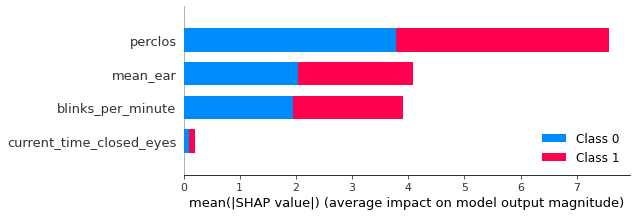

In [23]:
shap.summary_plot(shap_values, features=x_test, feature_names=x_test.columns)

### ANALISIS 001 DE NTHUDDD

In [13]:
import pandas as pd
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
import lightgbm as lgb
from joblib import load, dump
from sklearn.metrics import classification_report
from itertools import chain, combinations

metricas_analisis = [
    "frame_count", "perclos", "mean_ear", "current_time_closed_eyes", "blinks_per_minute",
    "yawns_per_minute", "head_nods_per_minute", "mean_blink_time", "drowsiness"
]
train_path = "NTHUDDD_dataset/train/"
test_path = "NTHUDDD_dataset/test/"
label = "drowsiness"
train_df_list = []
test_df_list = []
for filename in os.listdir(train_path):
    if "night" not in filename:
        file = os.path.join(train_path, filename)
        if os.path.isfile(file) and filename[-4:] == ".csv":
            df = pd.read_csv(file)
            
            file_data = filename.split("_")
            df["subject"] = filename[:3]
            df["scenario"] = file_data[1]
            df["state"] = file_data[2][:-4]
            df["id"] = df['subject'] + df['scenario'] + df['state']
            train_df_list.append(df)

for filename in os.listdir(test_path):
    if "night" not in filename:
        file = os.path.join(test_path, filename)
        if os.path.isfile(file) and filename[-4:] == ".csv":
            df = pd.read_csv(file)[metricas_analisis]
            
            file_data = filename.split("_")
            df["subject"] = filename[:3]
            df["scenario"] = file_data[1]
            df["state"] = file_data[2][:-4]
            df["id"] = df['subject'] + df['scenario'] + df['state']
            test_df_list.append(df)

train_big_df = pd.concat(train_df_list)
test_big_df = pd.concat(test_df_list)
# big_df = big_df.drop("Unnamed: 0.1", axis=1)
# train_big_df.head()
test_big_df.head()

,frame_count,perclos,mean_ear,current_time_closed_eyes,blinks_per_minute,yawns_per_minute,head_nods_per_minute,mean_blink_time,drowsiness,subject,scenario,state,id
0,1.0,0.0,0.282571,0.0,0.0,0.0,0.0,0.0,0,003,glasses,mix,003glassesmix
1,2.0,0.0,0.282600,0.0,0.0,0.0,0.0,0.0,0,003,glasses,mix,003glassesmix
2,3.0,0.0,0.285497,0.0,0.0,0.0,0.0,0.0,0,003,glasses,mix,003glassesmix
3,4.0,0.0,0.287867,0.0,0.0,0.0,0.0,0.0,0,003,glasses,mix,003glassesmix
4,5.0,0.0,0.288740,0.0,0.0,0.0,0.0,0.0,0,003,glasses,mix,003glassesmix


In [104]:
train_big_df.to_csv("NTHUDDD_dataset/big_df.csv")

In [64]:
filtered_train_big_df = train_big_df.copy()
filtered_test_big_df = test_big_df.copy()
filtered_train_big_df = filtered_train_big_df[filtered_train_big_df["scenario"] == "noglasses"]
filtered_train_big_df = filtered_train_big_df[filtered_train_big_df["subject"].isin(["001", "008", "009", "013", "023", "034", "035", "036"]) ]
# filtered_big_df = filtered_big_df[filtered_big_df["subject"].isin(["011"]) ]

filtered_test_big_df = filtered_test_big_df[filtered_test_big_df["scenario"] == "noglasses"]
filtered_test_big_df = filtered_test_big_df[filtered_test_big_df["subject"].isin(["011", "016"])]
# filtered_test_big_df = filtered_test_big_df[filtered_test_big_df["subject"].isin(["003", "010", "011", "014", "016", "017", "018"])]
filtered_train_big_df.groupby(["subject", label]).mean()

Unnamed: 0  mean_ear  blink_frequency  blinks_per_minute  \
subject drowsiness                                                              
001     0           1067.642568  0.273920         0.019325          34.785032   
        1           1275.309729  0.230920         0.017438          31.388032   
008     0           1073.674378  0.264187         0.006470          11.646647   
        1           1426.460290  0.229706         0.002981           5.364953   
009     0           1083.424492  0.341260         0.006715          12.087709   
        1           1381.634457  0.263151         0.014016          25.228343   
013     0           1193.620854  0.230129         0.004977           8.958660   
        1           1412.869310  0.206811         0.008068          14.522284   
023     0           1085.500640  0.254868         0.008463          15.233257   
        1           1362.552004  0.222769         0.011397          20.513807   
034     0           1126.904202  0.270344         0.010117          17.708952   
        1           1513.560251  0.240665         0.012201          21.961459   
035     0           1193.685722  0.233567         0.002868           5.161517   
        1           1393.054435  0.198036         0.005840          10.365179   
036     0           1181.778660  0.234842         0.014850          26.729577   
        1           1376.280821  0.188333         0.015393          27.706649   

                    current_time_closed_eyes   perclos  yawns_per_minute  \
subject drowsiness                                                         
001     0                           0.018331  0.097407          0.000000   
        1                           0.693891  0.234391          1.597438   
008     0                           0.015197  0.027463          0.269427   
        1                           0.776630  0.160146          1.162418   
009     0                           0.013514  0.041029          0.031166   
        1                           0.831609  0.232414          1.418793   
013     0                           0.005569  0.023734          0.000000   
        1                           0.341648  0.226982          1.912972   
023     0                           0.094322  0.074115          0.000000   
        1                           0.093104  0.146232          2.343012   
034     0                           0.008354  0.045511          2.055566   
        1                           0.104610  0.155642          2.637666   
035     0                           0.001272  0.015296          0.000000   
        1                           0.692329  0.267221          2.665463   
036     0                           0.003321  0.083918          0.602359   
        1                           0.665963  0.279530          1.224921   

                    head_nods_per_minute  mean_blink_time        yaw  ...  \
subject drowsiness                                                    ...   
001     0                       0.126032         0.178529  30.991209  ...   
        1                       1.146006         0.481951  29.649814  ...   
008     0                       0.000000         0.068117  17.201944  ...   
        1                       0.000000         1.266744  17.630816  ...   
009     0                       0.159240         0.161064  23.802120  ...   
        1                       0.803872         0.743762  22.045594  ...   
013     0                       0.000000         0.103843  23.235451  ...   
        1                       0.913584         0.940046  27.225487  ...   
023     0                       0.000000         0.194753  23.005551  ...   
        1                       1.785403         0.357568  15.186149  ...   
034     0                       0.000000         0.105261  34.190768  ...   
        1                       1.424761         0.444390  27.191411  ...   
035     0                       0.000000         0.065400  34.703461  ...   
        1                       1.8257

#### NUM NULL ROWS

In [65]:
print(f"TOTAL NUM ROWS: {filtered_train_big_df.shape[0]}")
print(f"NUM NULL ROWS: {filtered_train_big_df.shape[0] - filtered_train_big_df.dropna().shape[0]}")
train_big_df_nonull = filtered_train_big_df.dropna().sample(frac=1)

print(f"TOTAL NUM ROWS: {filtered_test_big_df.shape[0]}")
print(f"NUM NULL ROWS: {filtered_test_big_df.shape[0] - filtered_test_big_df.dropna().shape[0]}")
test_big_df_nonull = filtered_test_big_df.dropna().sample(frac=1)

TOTAL NUM ROWS: 79534
NUM NULL ROWS: 2549
TOTAL NUM ROWS: 11269
NUM NULL ROWS: 100


#### Experimento 1: Exploracion del mejor conjunto de metricas

La idea es construir el experimento para que con una simple ejecución obtengamos un modelo por cada posible combinacion de metricas y sus respectivos resultados.

In [95]:
metricas_posibles = [
    "perclos", "current_time_closed_eyes",
    "yawns_per_minute", "head_nods_per_minute", "mean_blink_time"
]
tamano_minimo_combinacion = 3
tipo_modelo = "lgb"
experiment_folder = "model_experiments/experiment1/"
numero_metricas = len(metricas_posibles)
performance_results = []

combinacion_metricas = list(chain.from_iterable(combinations(metricas_posibles, size) for size in range(tamano_minimo_combinacion, numero_metricas + 1)))

In [ ]:
for ind, combinacion in enumerate(combinacion_metricas):
    print(ind)
    # model_features = ["mean_blink_time", "perclos", "current_time_closed_eyes", "yawns_per_minute", "head_nods_per_minute"]
    model_features = list(combinacion)
    x_train = train_big_df_nonull[model_features]
    y_train = train_big_df_nonull[label]
    x_test = test_big_df_nonull[model_features]
    y_test = test_big_df_nonull[label]
    
    if tipo_modelo == "lgb":
        model = lgb.LGBMClassifier(
            boosting_type="gbdt",
            num_leaves=400,
            num_iterations=1000,
            learning_rate=0.01,
            verbosity=-1,
            #early_stopping=20,
        )
        file = os.path.join(experiment_folder, f"lgb_model_{ind}.joblib")
    elif mod == "svm":
        model = svm.SVC(kernel="linear")
        file = os.path.join(experiment_folder, f"svm_model_{ind}.joblib")
    
    model.fit(x_train, y_train)
    dump(model, file)
    y_pred = model.predict(x_train)
    train_res = classification_report(y_train, y_pred)
    y_pred2 = model.predict(x_test)
    test_res = classification_report(y_test, y_pred2)
    
    print(train_res)
    print(test_res)

    performance_results.append((model_features, train_res, test_res))

#### Escribimos los resultados

In [97]:
file_path = os.path.join(experiment_folder, "report.txt")
if os.path.exists(file_path):
    os.remove(file_path)

file = open(file_path, "a")
for model_features, train_res, test_res in performance_results:
    file.write(f"{str(model_features)}\n")
    file.write(train_res)
    file.write(test_res)
    file.write("\n")
file.close()

In [67]:
model_features = ['perclos', 'current_time_closed_eyes', 'yawns_per_minute', 'head_nods_per_minute', 'mean_blink_time']
x_train = train_big_df_nonull[model_features]
y_train = train_big_df_nonull[label]
x_test = test_big_df_nonull[model_features]
y_test = test_big_df_nonull[label]
# test_size = len(labels)
# x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

In [68]:
mod = "lgb"
if mod == "lgb":
    model = lgb.LGBMClassifier(
        boosting_type="gbdt",
        num_leaves=40,
        num_iterations=1000,
        learning_rate=0.001,
        verbosity=1,
        #early_stopping=20,
    )
    file = "lgb_models/lgb_model_0.joblib"
elif mod == "svm":
    model = svm.SVC(kernel="linear")
    file = "svm_model_0.joblib"
model.fit(x_train, y_train)
dump(model, file)
y_pred = model.predict(x_train)
print(classification_report(y_train, y_pred))
y_pred2 = model.predict(x_test)
print(classification_report(y_test, y_pred2))

c:\Users\adrim\.conda\envs\TFG\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 45813, number of negative: 31172
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 76985, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.595090 -> initscore=0.385048
[LightGBM] [Info] Start training from score 0.385048
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     31172
           1       0.98      0.96      0.97     45813

    accuracy                           0.97     76985
   macro avg       0.97      0.97      0.97     76985
weighted avg       0.97      0.97      0.97     76985

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      6159
           1       0.77      0.98      0.86      5010

    accuracy   

In [17]:
import shap
import numpy as np
from joblib import load
model = load("lgb_models/lgb_model_0.joblib")
explainer = shap.TreeExplainer(model)

In [18]:
y_pred2 = model.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     37142
           1       0.97      0.89      0.93     58438

    accuracy                           0.92     95580
   macro avg       0.91      0.93      0.92     95580
weighted avg       0.93      0.92      0.92     95580



In [19]:
row = 1312
pd_df = np.asarray(x_test.iloc[[row]])
# pd_df = np.array([[0.24, 0.08, (2/30), 0.0, 0]])
shap_values = explainer.shap_values(pd_df)
expected_value = explainer.expected_value

shap_values0 = shap_values[0]
shap_values1 = shap_values[1]
expected_value0 = expected_value[0]
expected_value1 = expected_value[1]

print(np.asarray(y_test.iloc[[row]]))
print(model.predict(pd_df))
print(shap_values)
print(expected_value)

[1]
[1]
[array([[-0.7184165 , -0.55806842,  0.10872871,  2.13483555, -4.49978758]]), array([[ 0.7184165 ,  0.55806842, -0.10872871, -2.13483555,  4.49978758]])]
[-2.404915409856095, 2.404915409856095]


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


Index(['mean_blink_time', 'perclos', 'current_time_closed_eyes',
       'yawns_per_minute', 'head_nods_per_minute'],
      dtype='object')
[[0.         0.         0.         1.78571429 0.        ]]


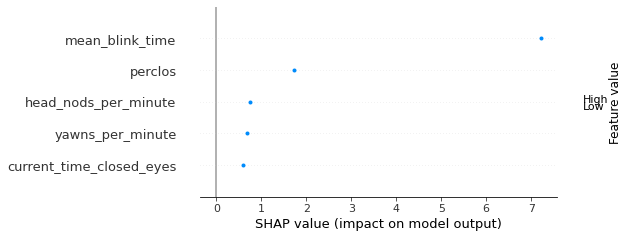

In [26]:
print(x_test.columns)
print(pd_df)
shap.summary_plot(shap_values0, features=pd_df, feature_names=x_test.columns, plot_type="dot")

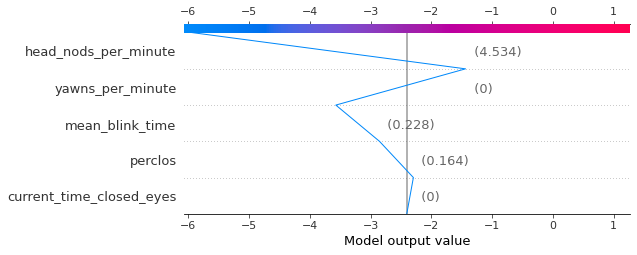

In [20]:
shap.decision_plot(expected_value0, shap_values0, features=pd_df, feature_names=list(x_test.columns))